- Computer Vision w/ CNNs
  - Self driving cars, medicine, sports
  - Object detetction etc.
- Florent Dufour
- 2016 - 2022

- Also possible to work on images with DNN, e.g., NMIST fashion dataset
  - But data must be very normalised, centered, etc.
  - DNN is not very flexible, not applicable for real life imaging
  - CNN find features unspecifically (possible to classify data on a global scale: even when flipping, cropping etc.)
- Conv layer:
  - Provides an output features map
  - Features = filters
  - Combination of features give us insights in the image
- DNN provides numerical values / CNN provides features map
- Pooling: min, max, average: Reduce dimensionality of output features 

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt

In [10]:
# Load data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# Labels for humans
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
# Create the model
## We stack convolutional layers and pooling layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # 32 filters of 3x3 over input data
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [12]:
# Add the dense layer that takes the features and tell us what the map to class is

model.add(layers.Flatten()) # Flatten all pixel: 4x4x64 > 1D (1024)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # 10 = number of classes

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [15]:
# Compile model
model.compile(optimizer='adam',
  loss=losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Fit model
history = model.fit(train_images, 
                    train_labels, 
                    epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5129 - accuracy: 0.4490 - val_loss: 1.2563 - val_accuracy: 0.5414
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1658 - accuracy: 0.5882 - val_loss: 1.1339 - val_accuracy: 0.5981
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0022 - accuracy: 0.6481 - val_loss: 1.0043 - val_accuracy: 0.6480
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8953 - accuracy: 0.6863 - val_loss: 0.9679 - val_accuracy: 0.6603
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8208 - accuracy: 0.7126 - val_loss: 0.8921 - val_accuracy: 0.6902
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7578 - accuracy: 0.7344 - val_loss: 0.8753 - val_accuracy: 0.6913
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7024 - accuracy: 0.7546 - val_loss: 0.8795 -

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_acc

313/313 - 4s - loss: 0.8624 - accuracy: 0.7171 - 4s/epoch - 12ms/step


0.7171000242233276

# Working with small datasets
# Data augmentation

- Need a lot of data when working with CNN
- Turn 1 image into several images
  - Rotate, flip, shift, crop, stretch...
  - Use the ImageDataGenerator provided by Keras

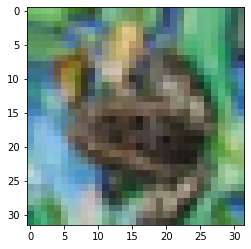

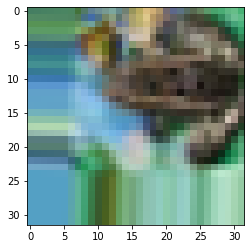

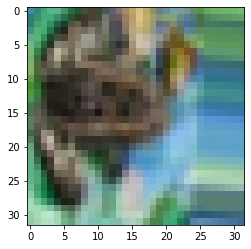

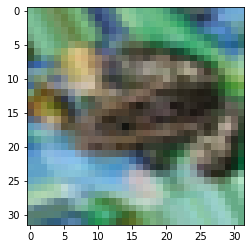

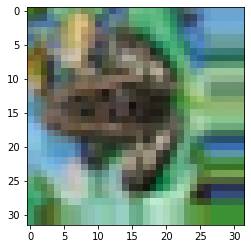

In [19]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
index = 200
test_img = train_images[index]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

## Pre-trained models

- A base model provided by external provider (e.g. Google)
- We need to fine tune it: The last layers
  - Earlier features are provided by the pre-trained model (generalising)
  - We modify last layers with our data

In [ ]:
# See instructor notebook